In [ ]:
#импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [ ]:
# Загрузить данные
columns = ['age',

    'workclass',

    'fnlwgt',

    'education',

    'education-num',

    'marital-status',

    'occupation',

    'relationship',

    'race',

    'sex',

    'capital-gain',

    'capital-loss',

    'hours-per-week',

    'native-country',

    'salary']
data = pd.read_csv('adult.data.csv', names = columns)

In [ ]:
#смотрим вид нашей таблицы
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#просматриваем тип данных нашей таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#удаляем столбцы, которые мы не сможем преобразовать в числовые значения
data = data.drop(['workclass','education','marital-status','occupation','relationship','race','native-country'], axis=1)

In [ ]:
#далее просматриваем какие столбцы остались
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,Male,2174,0,40,<=50K
1,50,83311,13,Male,0,0,13,<=50K
2,38,215646,9,Male,0,0,40,<=50K
3,53,234721,7,Male,0,0,40,<=50K
4,28,338409,13,Female,0,0,40,<=50K


In [ ]:
text_data = data['sex']

In [ ]:
text_data = [string.strip() for string in text_data]

In [ ]:
strip_upper = [string.lower() for string in text_data]

In [ ]:
data.sex = strip_upper

In [ ]:
#преобразуем yes и no в 1 и 0
data['sex'] = data.sex.map(dict(male=1,female=0))

In [ ]:
data.salary = strip_upper

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['salary'] = le.fit_transform(data['salary'].values)
data

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,1,2174,0,40,1
1,50,83311,13,1,0,0,13,1
2,38,215646,9,1,0,0,40,1
3,53,234721,7,1,0,0,40,1
4,28,338409,13,0,0,0,40,0
5,37,284582,14,0,0,0,40,0
6,49,160187,5,0,0,0,16,0
7,52,209642,9,1,0,0,45,1
8,31,45781,14,0,14084,0,50,0
9,42,159449,13,1,5178,0,40,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_value = data['salary']
training_point = data.drop('salary', axis=1)

In [ ]:
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [ ]:
#создаём модель по которой мы определим признаки важности
model = randomforest.fit(training_point,training_value)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
#определяем значимые столбцы
importances = model.feature_importances_
importances


array([0.00796543, 0.00522829, 0.00351647, 0.94278204, 0.00340718,
       0.0018311 , 0.03526949])

In [ ]:
#используем модель леса
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [ ]:
#Создаём объект, который отбирает признаки с важностью большей или равной порогу
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(randomforest,threshold=0.1)

In [ ]:
#Выполняем подгонку новой матрицы используя селектор
features_important = selector.fit_transform(training_point,training_value)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
#Делим нашу выборку на обучающую и тестовую
x_train, x_test, y_train, y_test=train_test_split(features_important, training_value, test_size=0.2)

In [ ]:
#обучаем нашу модель
model = randomforest.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
#проверяем нашу модель
test_predictions_randomforest = randomforest.predict(x_test)

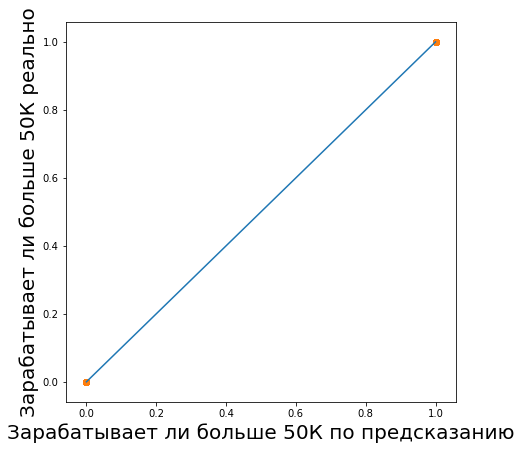

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions_randomforest)
plt.scatter(y_test, test_predictions_randomforest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_randomforest)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Зарабатывает ли больше 50К по предсказанию', fontsize=20)
plt.ylabel('Зарабатывает ли больше 50К реально', fontsize=20);